
# Football Object Detection with Yolo V8L

##📄 Proje Açıklaması

Bu proje, YOLOv8L modeli kullanılarak futbol sahasında nesne tespiti gerçekleştirmeyi amaçlamaktadır. Hedef; oyuncu, kaleci, hakem ve top gibi futbol ile ilgili nesneleri maç görüntülerinden doğru bir şekilde tespit etmektir.
Proje kapsamında özel bir veri seti kullanılmış olup yaklaşık 1.100 eğitim görseli ve 4 farklı sınıf etiketi bulunmaktadır. Model, NVIDIA A100 GPU üzerinde, 640x640 çözünürlük ile 25 epoch boyunca eğitilmiştir.

**Projenin Kullanım Alanları:**
-	Spor Analitiği – Oyuncu konumlarını ve hareketlerini takip etmek
-	Hakem Karar Destek – Faul ve top konumu tespiti
-	Canlı Yayın Geliştirmeleri – Gerçek zamanlı veri görselleştirmeleri



## ⚠️ Disclaimer

YOLOv8L, Ultralytics YOLOv8 ailesinin en güçlü ve en güncel modellerinden biridir. Eğer bu notebook içerisinde hata alırsanız veya çalışmada bir sorun yaşarsanız, lütfen çekinmeden Roboflow Notebooks deposunda bir issue açın..

## 💡 Pro İpucu: GPU Kullanımı

Eğer bu notebook’u Google Colab üzerinde çalıştırıyorsanız:
Edit -> Notebook Settings -> Hardware Accelerator -> GPU seçeneğini işaretleyin ve Save’e basın. Bu, eğitim süresini önemli ölçüde hızlandıracaktır.

## 📚 Eğitim Adımları

Bu tutorial’da aşağıdaki konuları ele alacağız:

✅ Gerekli Kurulumlar

✅ YOLOv8 Kurulumu

✅ Açık veri setlerini bulma

✅ ⭐ Kendi veri setinizle YOLOv8L modelini eğitme

✅ Eğitilen modeli yükleme

✅ Modeli değerlendirme

✅ Eğitilmiş model ile tahmin (inference)

✅ Sonuç

✅ Kaynaklar



## 🔥 Hadi Başlayalım!

## ⚡ Başlamadan Önce


GPU erişimimizin olduğundan emin olalım. Bunu kontrol etmek için nvidia-smi komutunu kullanabiliriz. Herhangi bir sorun olması durumunda Edit -> Notebook settings -> Hardware accelerator yolunu izleyin, ardından GPU seçeneğini işaretleyin ve Save butonuna tıklayın.

In [ ]:
!nvidia-smi

Mon Jul 21 12:34:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Install YOLO-v8L


In [1]:
!pip install -q roboflow==1.1.49
!pip install -q supervision==0.25.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 4.9 MB/s eta 0:00:00


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Önceden Eğitilmiş YOLOv8L Modeli ile Çıkarım (Inference)

Bu bölümde YOLOv8L modelini kullanacağız. YOLOv8L, Ultralytics ailesinin en yeni ve en güçlü nesne tespit modellerinden biridir. Model, COCO veri seti üzerinde önceden eğitilmiş olup hız ve doğruluk arasında mükemmel bir denge sağlar. Bu nedenle hem gerçek zamanlı hem de yüksek doğruluk gerektiren uygulamalar için uygundur.
<br>


Aşağıda, farklı YOLO modelleri arasındaki hız ve doğruluk karşılaştırmasını gösteren bir örnek grafik bulunmaktadır.

YOLOv8 bu karşılaştırmalarda oldukça rekabetçi bir performans sergilemekted

<br>

![YOLO-NAS](https://raw.githubusercontent.com/Deci-AI/super-gradients/master/documentation/source/images/yolo_nas_frontier.png)




In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
from ultralytics import YOLO

# YOLOv8 large model (COCO pretrained)
model = YOLO("yolov8l.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 83.7M/83.7M [00:00<00:00, 211MB/s]


### Use Example Data (Below, We'll Prepare Our Own Custom Dataset)

In [5]:
f"{HOME}/data"

'/content/data'

In [6]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-5.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-6.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-7.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-8.jpeg

/content
/content/data


### Single Image Inference

In [17]:
SOURCE_IMAGE_PATH = f"/content/data/yigithan-me.jpg"

In [14]:
SOURCE_IMAGE_PATH

'/content/data/me_yigithan.jpg'

In [24]:
import cv2

image = cv2.imread(SOURCE_IMAGE_PATH)
result = model.predict(image, conf=0.35)


0: 640x480 2 persons, 1 handbag, 14.4ms
Speed: 3.4ms preprocess, 14.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)


### Output format

For every image YOLO-NAS will produce `ImageDetectionPrediction` object containing the following fields:
- `image` - `numpy.ndarray` - image used for inference
- `class_names` - `List[str]` - list of categories used for training the model
- `prediction` - `DetectionPrediction` - class instance containing detailed informationabout the obtained detections
   - `bboxes_xyxy` - `numpy.ndarray` of `float32` and `(N, 4)` shape - detection bounding boxes in `xyxy` format
   - `confidence` - `numpy.ndarray` of `float32` and `(N,)` shape - confidence value between `0` and `1`
   - `labels` - `numpy.ndarray` of `float32` and `(N,)` shape - `class_id` related to the index in the `class_names` list

In [ ]:
type(result)

list

### Visualize Inference Result

As with other models, you can use Supervision to visualize your results. You can read more about the integration between Supervision and YOLO-NAS [here](https://roboflow.github.io/supervision/detection/core/#supervision.detection.core.Detections.from_yolo_nas), and about visualizing detection [here](https://roboflow.github.io/supervision/detection/annotate/#supervision.detection.annotate.BoxAnnotator.annotate).


0: 640x480 2 persons, 1 handbag, 13.3ms
Speed: 4.2ms preprocess, 13.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)


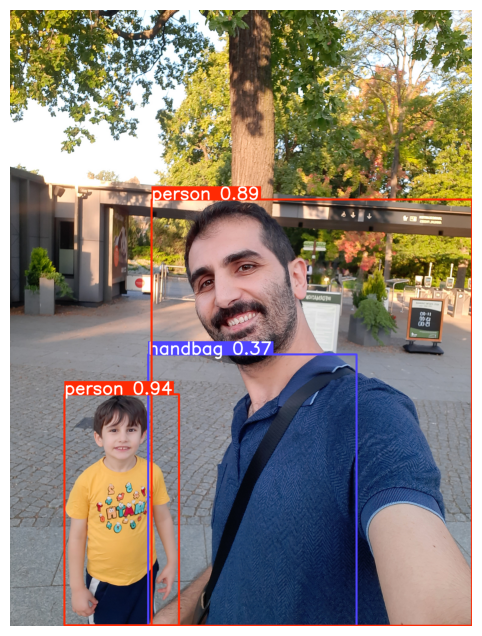

In [22]:
import matplotlib.pyplot as plt
import cv2

# Kaynak resmi tekrar yükle
image = cv2.imread(SOURCE_IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR → RGB dönüşümü

# Tahmin
results = model.predict(image, conf=0.35)

# YOLOv8 result objesi üzerinden çizim
annotated_image = results[0].plot()  # bounding box'ları ekler (numpy array döner)

# Görselleştirme
plt.figure(figsize=(10, 8))
plt.imshow(annotated_image)
plt.axis('off')
plt.show()


# Training YOLO-v8 on a Custom Dataset

## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images or video

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [25]:
%cd {HOME}

import roboflow
from roboflow import Roboflow

roboflow.login()

rf = Roboflow()

project = rf.workspace("roboflow-jvuqo").project("football-players-detection-2frwp")
dataset = project.version(1).download("yolov5")

/content
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Football-Players-Detection-1 in yolov5pytorch:: 100%|██████████| 2258/2258 [00:00<00:00, 7459.81it/s]


In [26]:
LOCATION = dataset.location
print("location:", LOCATION)
CLASSES = sorted(project.classes.keys())
print("classes:", CLASSES)

location: /content/Football-Players-Detection-1
classes: ['ball', 'goalkeeper', 'player', 'referee']


## Fine-tune on custom dataset

`ckpt_root_dir` - this is the directory where results from all your experiments will be saved

`experiment_name` - all checkpoints, logs, and tensorboards will be saved in a directory with the name you specify here.

In [27]:
from ultralytics import YOLO

# YOLOv8 large model (COCO pretrained)
model = YOLO("yolov8l.pt")

In [28]:
dataset_params = {
    'data_dir': LOCATION,
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': CLASSES
}

In [29]:
import os
import yaml

# Dataset parametrelerini kullanarak YAML oluştur
data_yaml = {
    'path': dataset_params['data_dir'],
    'train': dataset_params['train_images_dir'],
    'val': dataset_params['val_images_dir'],
    'test': dataset_params['test_images_dir'],
    'nc': len(dataset_params['classes']),
    'names': dataset_params['classes']
}

# Dosya yolu
yaml_path = os.path.join(dataset_params['data_dir'], 'data.yaml')

# Yazdır
with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml, f)

print(f"data.yaml oluşturuldu: {yaml_path}")


data.yaml oluşturuldu: /content/Football-Players-Detection-1/data.yaml


In [31]:
# Fine-tune et
model.train(
    data=os.path.join(dataset_params['data_dir'], 'data.yaml'),
    epochs=25,                 # MAX_EPOCHS
    batch=8,                   # BATCH_SIZE
    imgsz=640,                 # Default image size
    project='checkpoints',     # CHECKPOINT_DIR
    name='custom_experiment'   # EXPERIMENT_NAME
)


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Football-Players-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=custom_experiment, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

100%|██████████| 755k/755k [00:00<00:00, 17.0MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

  8                  -1  3   4461568  ultralytics.nn.modules.block.C2f             [512, 512, 3, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   4723712  ultralytics.nn.modules.block.C2f             [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  3   1247744  ultralytics.nn.modules.block.C2f             [768, 256, 3]                 
 16                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256,

100%|██████████| 5.35M/5.35M [00:00<00:00, 61.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1714.2±499.9 MB/s, size: 59.2 KB)


train: Scanning /content/Football-Players-Detection-1/train/labels... 1072 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1072/1072 [00:00<00:00, 1461.97it/s]

train: New cache created: /content/Football-Players-Detection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 652.7±414.8 MB/s, size: 58.0 KB)


val: Scanning /content/Football-Players-Detection-1/valid/labels... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<00:00, 1214.12it/s]

val: New cache created: /content/Football-Players-Detection-1/valid/labels.cache


Plotting labels to checkpoints/custom_experiment/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to checkpoints/custom_experiment
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.29G      1.304      1.072     0.8613        193        640: 100%|██████████| 134/134 [00:17<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all         38        905      0.539      0.639      0.495      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.08G      1.237     0.6985       0.84        204        640: 100%|██████████| 134/134 [00:15<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.05it/s]

                   all         38        905      0.823      0.639      0.714      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.13G      1.234     0.6609     0.8372        251        640: 100%|██████████| 134/134 [00:14<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.42it/s]

                   all         38        905       0.85      0.718       0.76      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25       6.5G      1.249     0.6675     0.8387        278        640: 100%|██████████| 134/134 [00:14<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.39it/s]

                   all         38        905      0.796      0.695      0.751      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.54G      1.169     0.5887      0.832        344        640: 100%|██████████| 134/134 [00:14<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.53it/s]

                   all         38        905      0.804      0.656      0.701      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.9G      1.153     0.5898     0.8293        254        640: 100%|██████████| 134/134 [00:14<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.44it/s]

                   all         38        905      0.889       0.69      0.769      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.95G       1.16     0.5854     0.8271        163        640: 100%|██████████| 134/134 [00:14<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.51it/s]

                   all         38        905      0.856      0.732      0.774      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      7.53G        1.1      0.552     0.8221        227        640: 100%|██████████| 134/134 [00:14<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.50it/s]

                   all         38        905      0.884       0.71      0.778      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      7.58G      1.104     0.5348     0.8206        290        640: 100%|██████████| 134/134 [00:14<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.07it/s]

                   all         38        905      0.909      0.725       0.79      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      7.62G      1.078     0.5268     0.8196        168        640: 100%|██████████| 134/134 [00:14<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.34it/s]

                   all         38        905       0.88      0.738      0.794      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      7.99G      1.082     0.5186     0.8186        248        640: 100%|██████████| 134/134 [00:14<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.94it/s]

                   all         38        905      0.895       0.78       0.82      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      8.35G      1.051     0.5054     0.8175        166        640: 100%|██████████| 134/134 [00:14<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.15it/s]

                   all         38        905      0.896      0.736      0.817      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25       8.4G      1.021     0.4974     0.8121        324        640: 100%|██████████| 134/134 [00:14<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.51it/s]

                   all         38        905      0.891      0.746      0.808      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      8.76G     0.9993     0.4799     0.8071        215        640: 100%|██████████| 134/134 [00:14<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.54it/s]

                   all         38        905      0.815      0.759      0.786      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      9.13G     0.9861     0.4676     0.8062        274        640: 100%|██████████| 134/134 [00:14<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.89it/s]

                   all         38        905      0.909      0.769      0.825      0.504


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      9.17G     0.9139     0.4474     0.8083        175        640: 100%|██████████| 134/134 [00:15<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.36it/s]

                   all         38        905      0.852      0.737      0.786      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      9.76G     0.9402     0.4572     0.8091        186        640: 100%|██████████| 134/134 [00:14<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.44it/s]

                   all         38        905      0.889      0.776      0.824      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25       9.8G     0.9043     0.4392     0.8062        188        640: 100%|██████████| 134/134 [00:14<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.13it/s]

                   all         38        905      0.931      0.771      0.819      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      10.2G     0.8911     0.4291      0.804        184        640: 100%|██████████| 134/134 [00:14<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.48it/s]

                   all         38        905      0.946      0.766      0.833      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      10.2G     0.8722     0.4127     0.8013        183        640: 100%|██████████| 134/134 [00:14<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.27it/s]

                   all         38        905      0.938      0.774      0.828      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      10.8G     0.8409     0.4029     0.7986        183        640: 100%|██████████| 134/134 [00:14<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.23it/s]

                   all         38        905      0.901      0.773      0.856      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      10.8G     0.8299     0.3967     0.7963        194        640: 100%|██████████| 134/134 [00:14<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.53it/s]

                   all         38        905      0.927      0.766      0.835      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      10.9G      0.817     0.3873      0.794        192        640: 100%|██████████| 134/134 [00:14<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.62it/s]

                   all         38        905      0.954       0.75      0.841      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.2G      0.792     0.3729     0.7919        178        640: 100%|██████████| 134/134 [00:14<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.57it/s]

                   all         38        905      0.931      0.779       0.85      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.8G     0.7788     0.3671     0.7914        188        640: 100%|██████████| 134/134 [00:14<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.49it/s]

                   all         38        905      0.947      0.772      0.851      0.529



25 epochs completed in 0.112 hours.
Optimizer stripped from checkpoints/custom_experiment/weights/last.pt, 87.6MB
Optimizer stripped from checkpoints/custom_experiment/weights/best.pt, 87.6MB

Validating checkpoints/custom_experiment/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 43,609,692 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.29it/s]


                   all         38        905      0.954      0.749       0.84      0.536
                  ball         35         35          1      0.335      0.468      0.157
            goalkeeper         27         27      0.956      0.813      0.966      0.656
                player         38        754      0.957      0.972      0.988      0.743
               referee         38         89      0.903      0.876      0.939      0.586
Speed: 0.1ms preprocess, 3.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to checkpoints/custom_experiment


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc0bc049190>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

**Model: YOLOv8-Large (YOLOv8L)**

Toplam parametre: 43,689,692 (~43.7M)

Katman sayısı: 112

GFLOPS: 164.8

GPU: NVIDIA A100-SXM4-40GB

Epochs: 25

Görüntü boyutu: 640

Batch size: 8

Optimizer: AdamW (lr=0.00125)

**Veri Seti**

Veri Seti ve Sınıf Bilgisi:
Validation set: 38 görüntü, 905 instance (etiketli nesne)

Toplam sınıf sayısı: 4 (ball, goalkeeper,player,referee)



**Genel Performans**

- mAP@50 değeri %85 seviyesinde, bu da modelin doğru tahmin yapabildiğini gösteriyor.

- mAP@50-95 ise %52.9, yani daha yüksek IoU gerektiren durumlarda performans biraz düşüyor. Bu durum özellikle küçük nesneler için beklenen bir sonuç.

**Sınıf Bazında**

- Player sınıfında mükemmele yakın bir sonuç var (mAP@50: %98.8, Recall %97.2).

- Referee ve Goalkeeper sınıfları da oldukça başarılı (mAP@50 sırasıyla %93.9 ve %96.6).

- Ball sınıfında ise ciddi bir sorun görülüyor: Recall sadece %33.5, mAP@50-95 ise %15.7. Bu, topun çoğu zaman algılanmadığını gösteriyor. Bu durum genellikle topun küçük boyutu veya görsellerde karmaşık sahnelerden kaynaklanır.

**Precision ve Recall Dengesi**

- Precision oldukça yüksek (genelde >%90), bu da modelin yanlış pozitifleri minimumda tuttuğunu gösteriyor.

- Recall, özellikle top sınıfında düşük, yani model bazı nesneleri kaçırıyor.

**İyileştirme Alanları**

- Daha fazla top örneği eklenmeli ve data augmentation (özellikle küçük nesneleri büyütmeye yönelik) artırılmalı.

- Epoch sayısı (şu an 25) artırılabilir.

- Daha yüksek çözünürlükte eğitim (640 → 960 veya 1280) küçük nesnelerin tespiti için faydalı olur.

- Belki class weights ile top sınıfına ekstra önem verilebilir.

## Visualization

In [35]:
import glob
from IPython.display import Image, display

/content


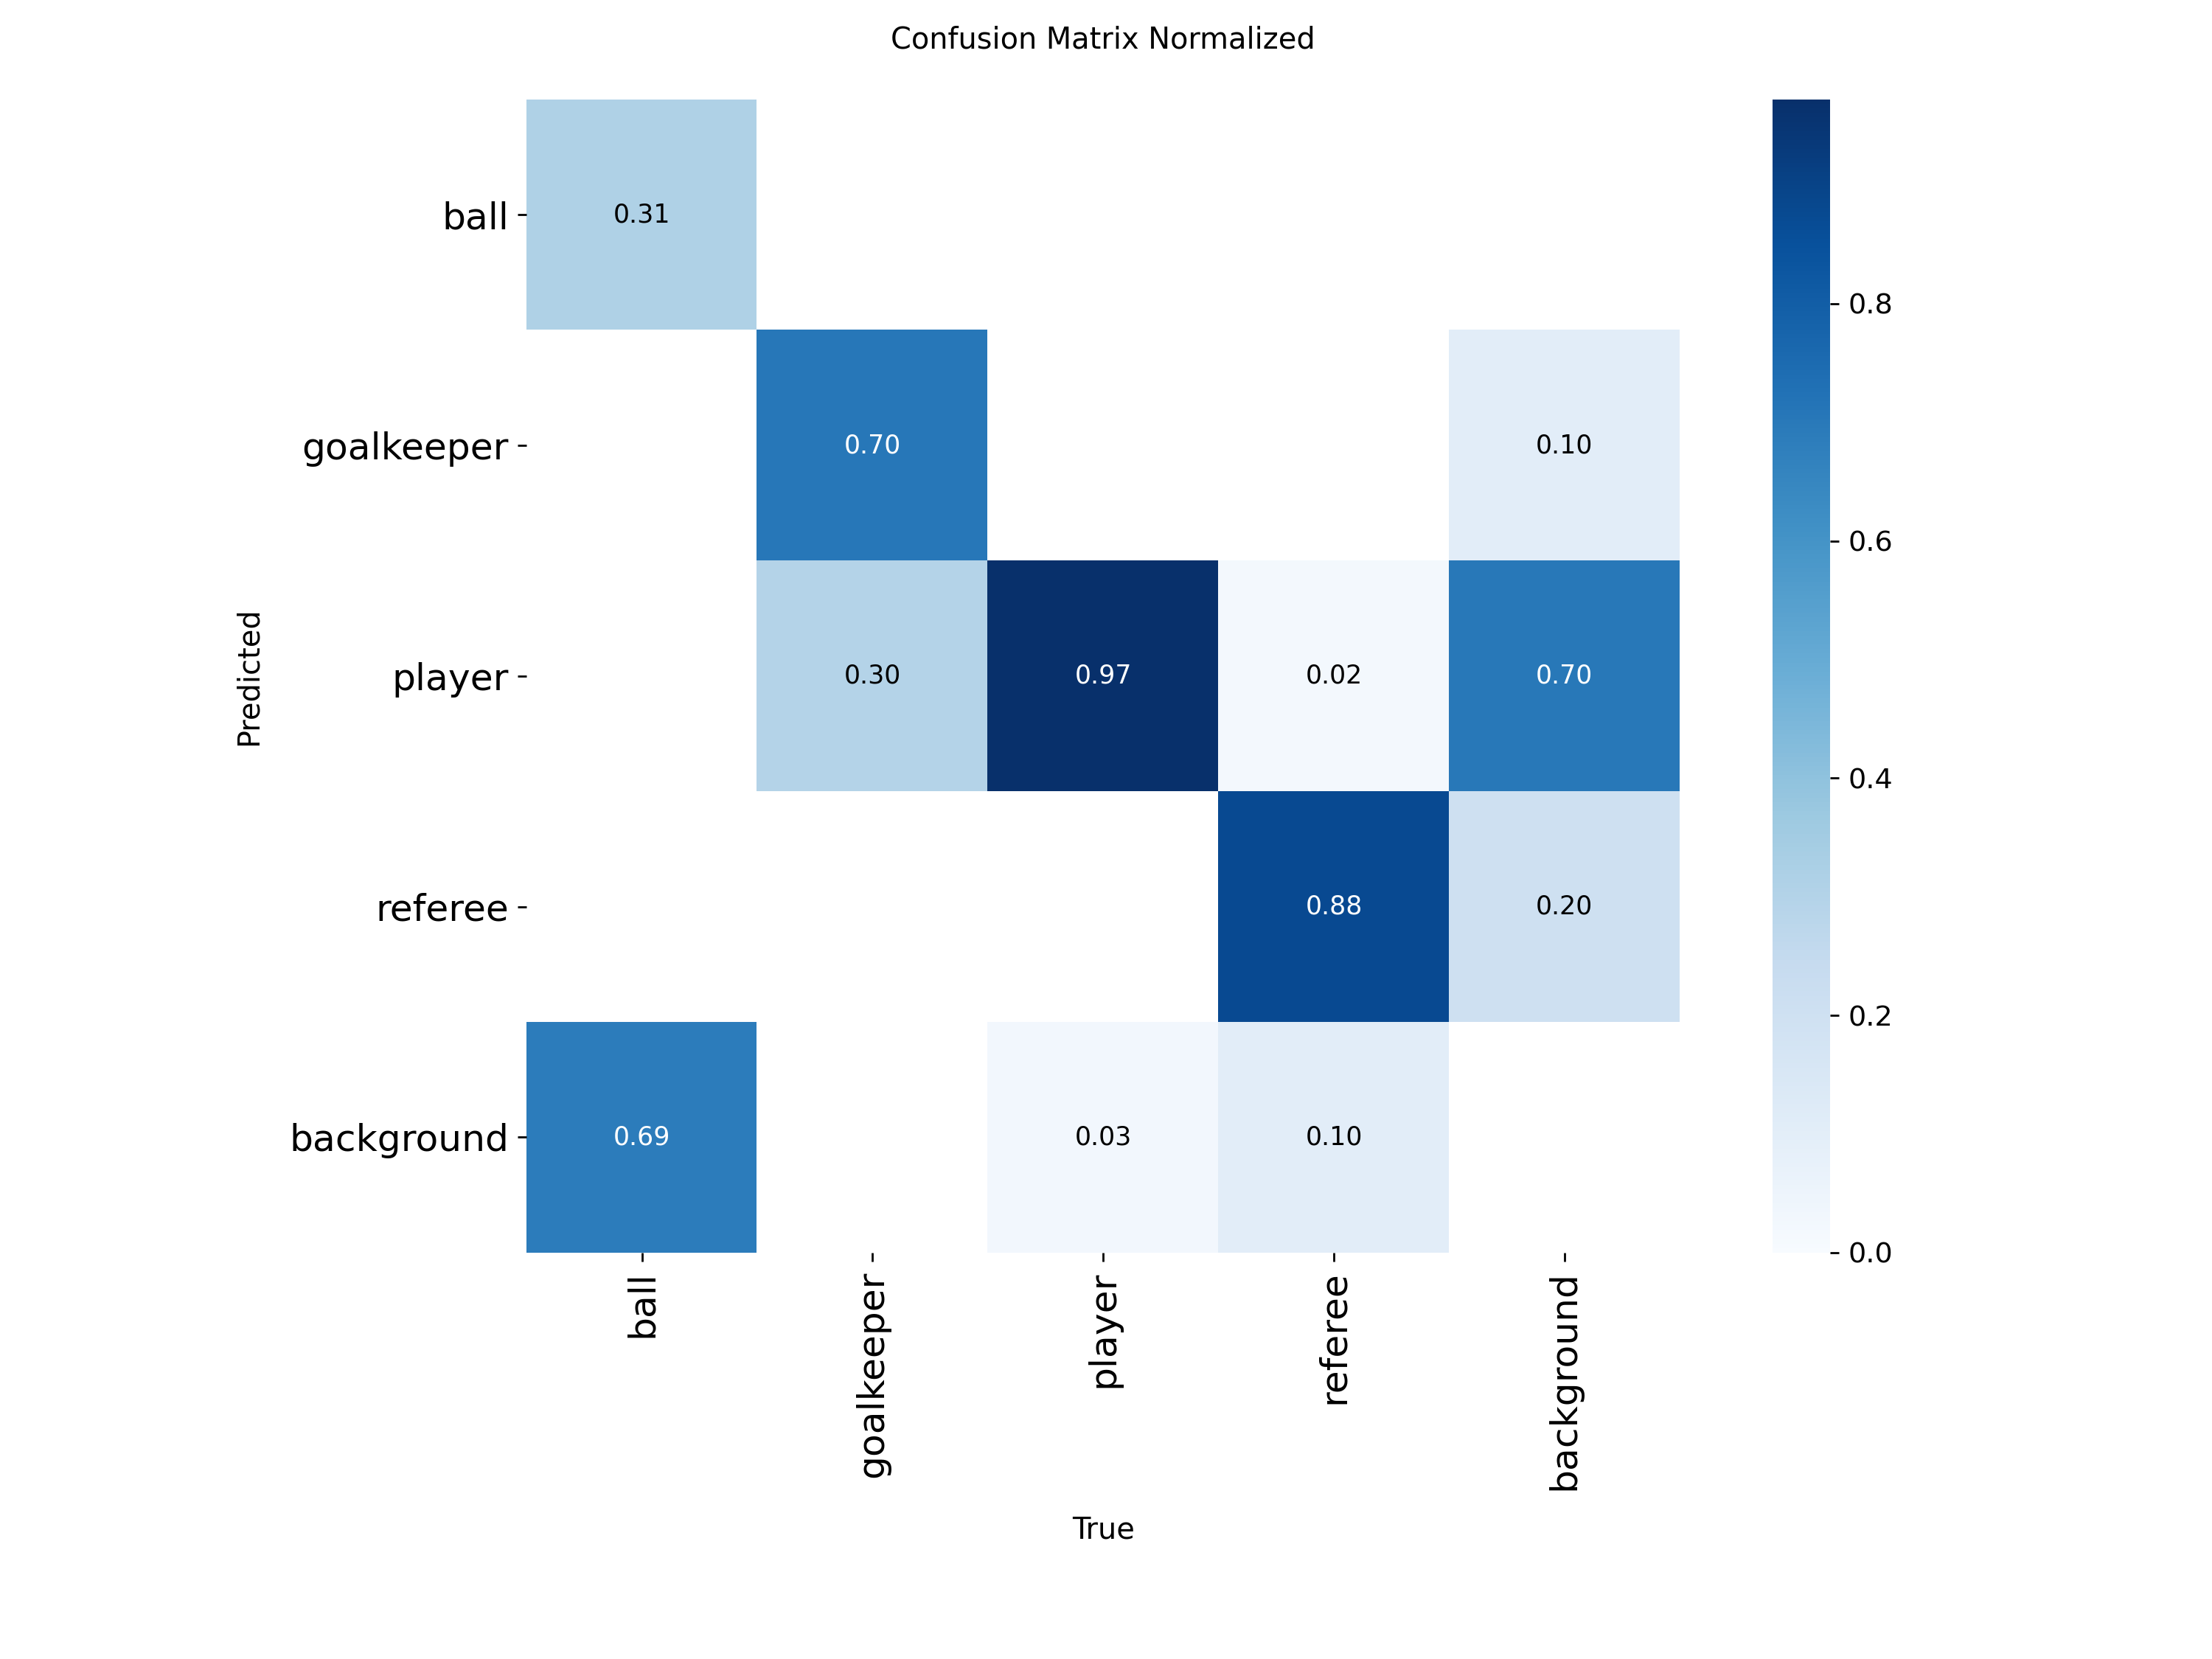

In [36]:
%cd {HOME}
Image(filename=f'/content/checkpoints/custom_experiment/confusion_matrix_normalized.png', width=600)

/content


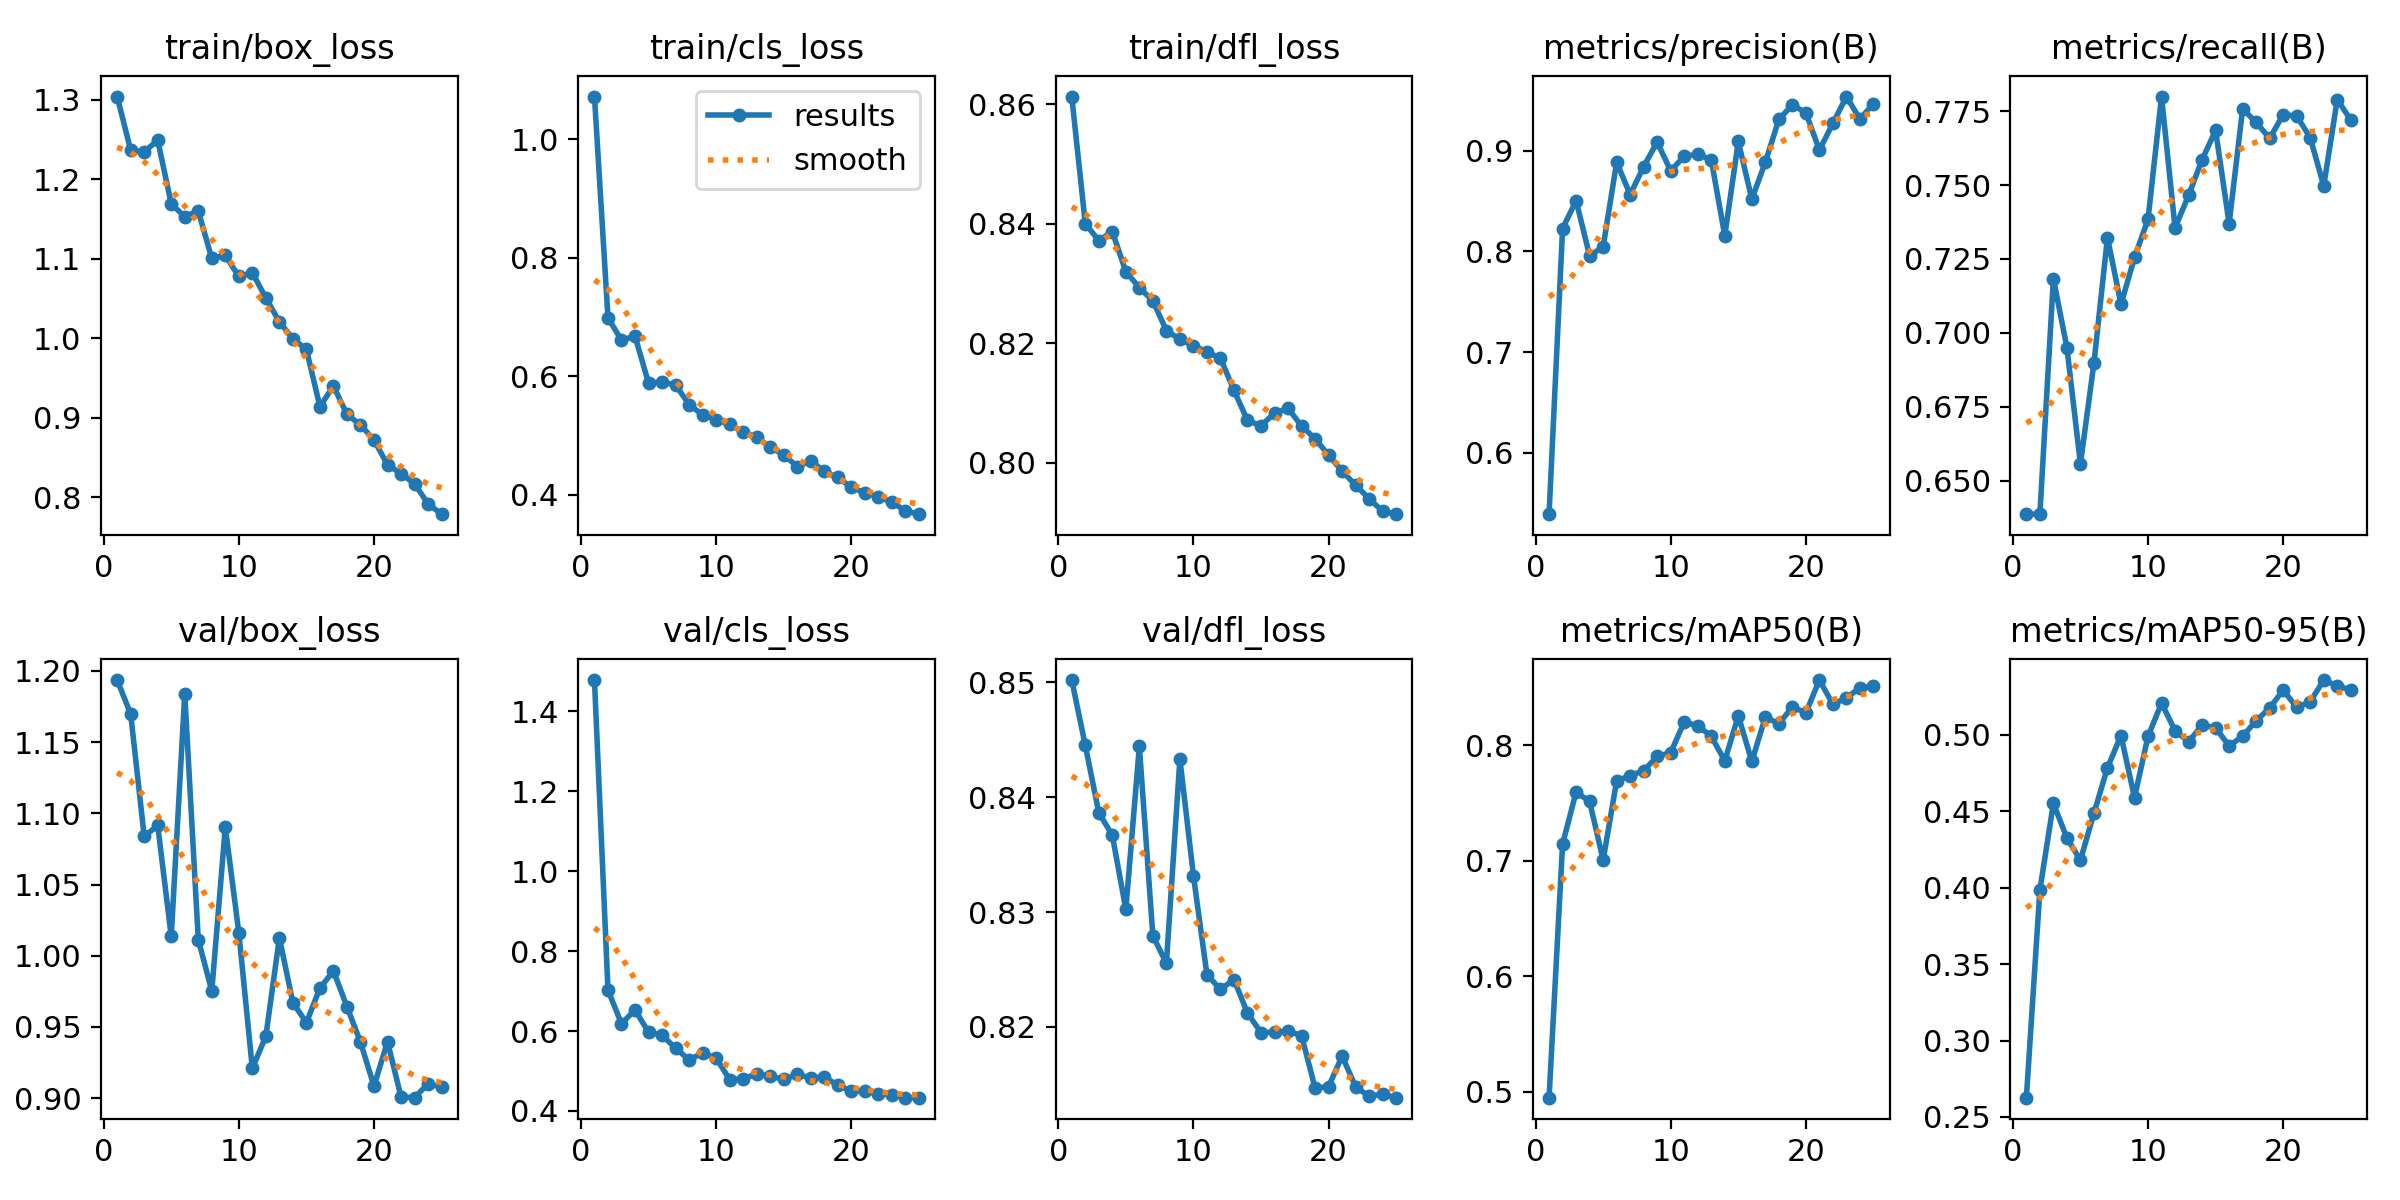

In [37]:
%cd {HOME}
Image(filename=f'/content/checkpoints/custom_experiment/results.png', width=600)

/content


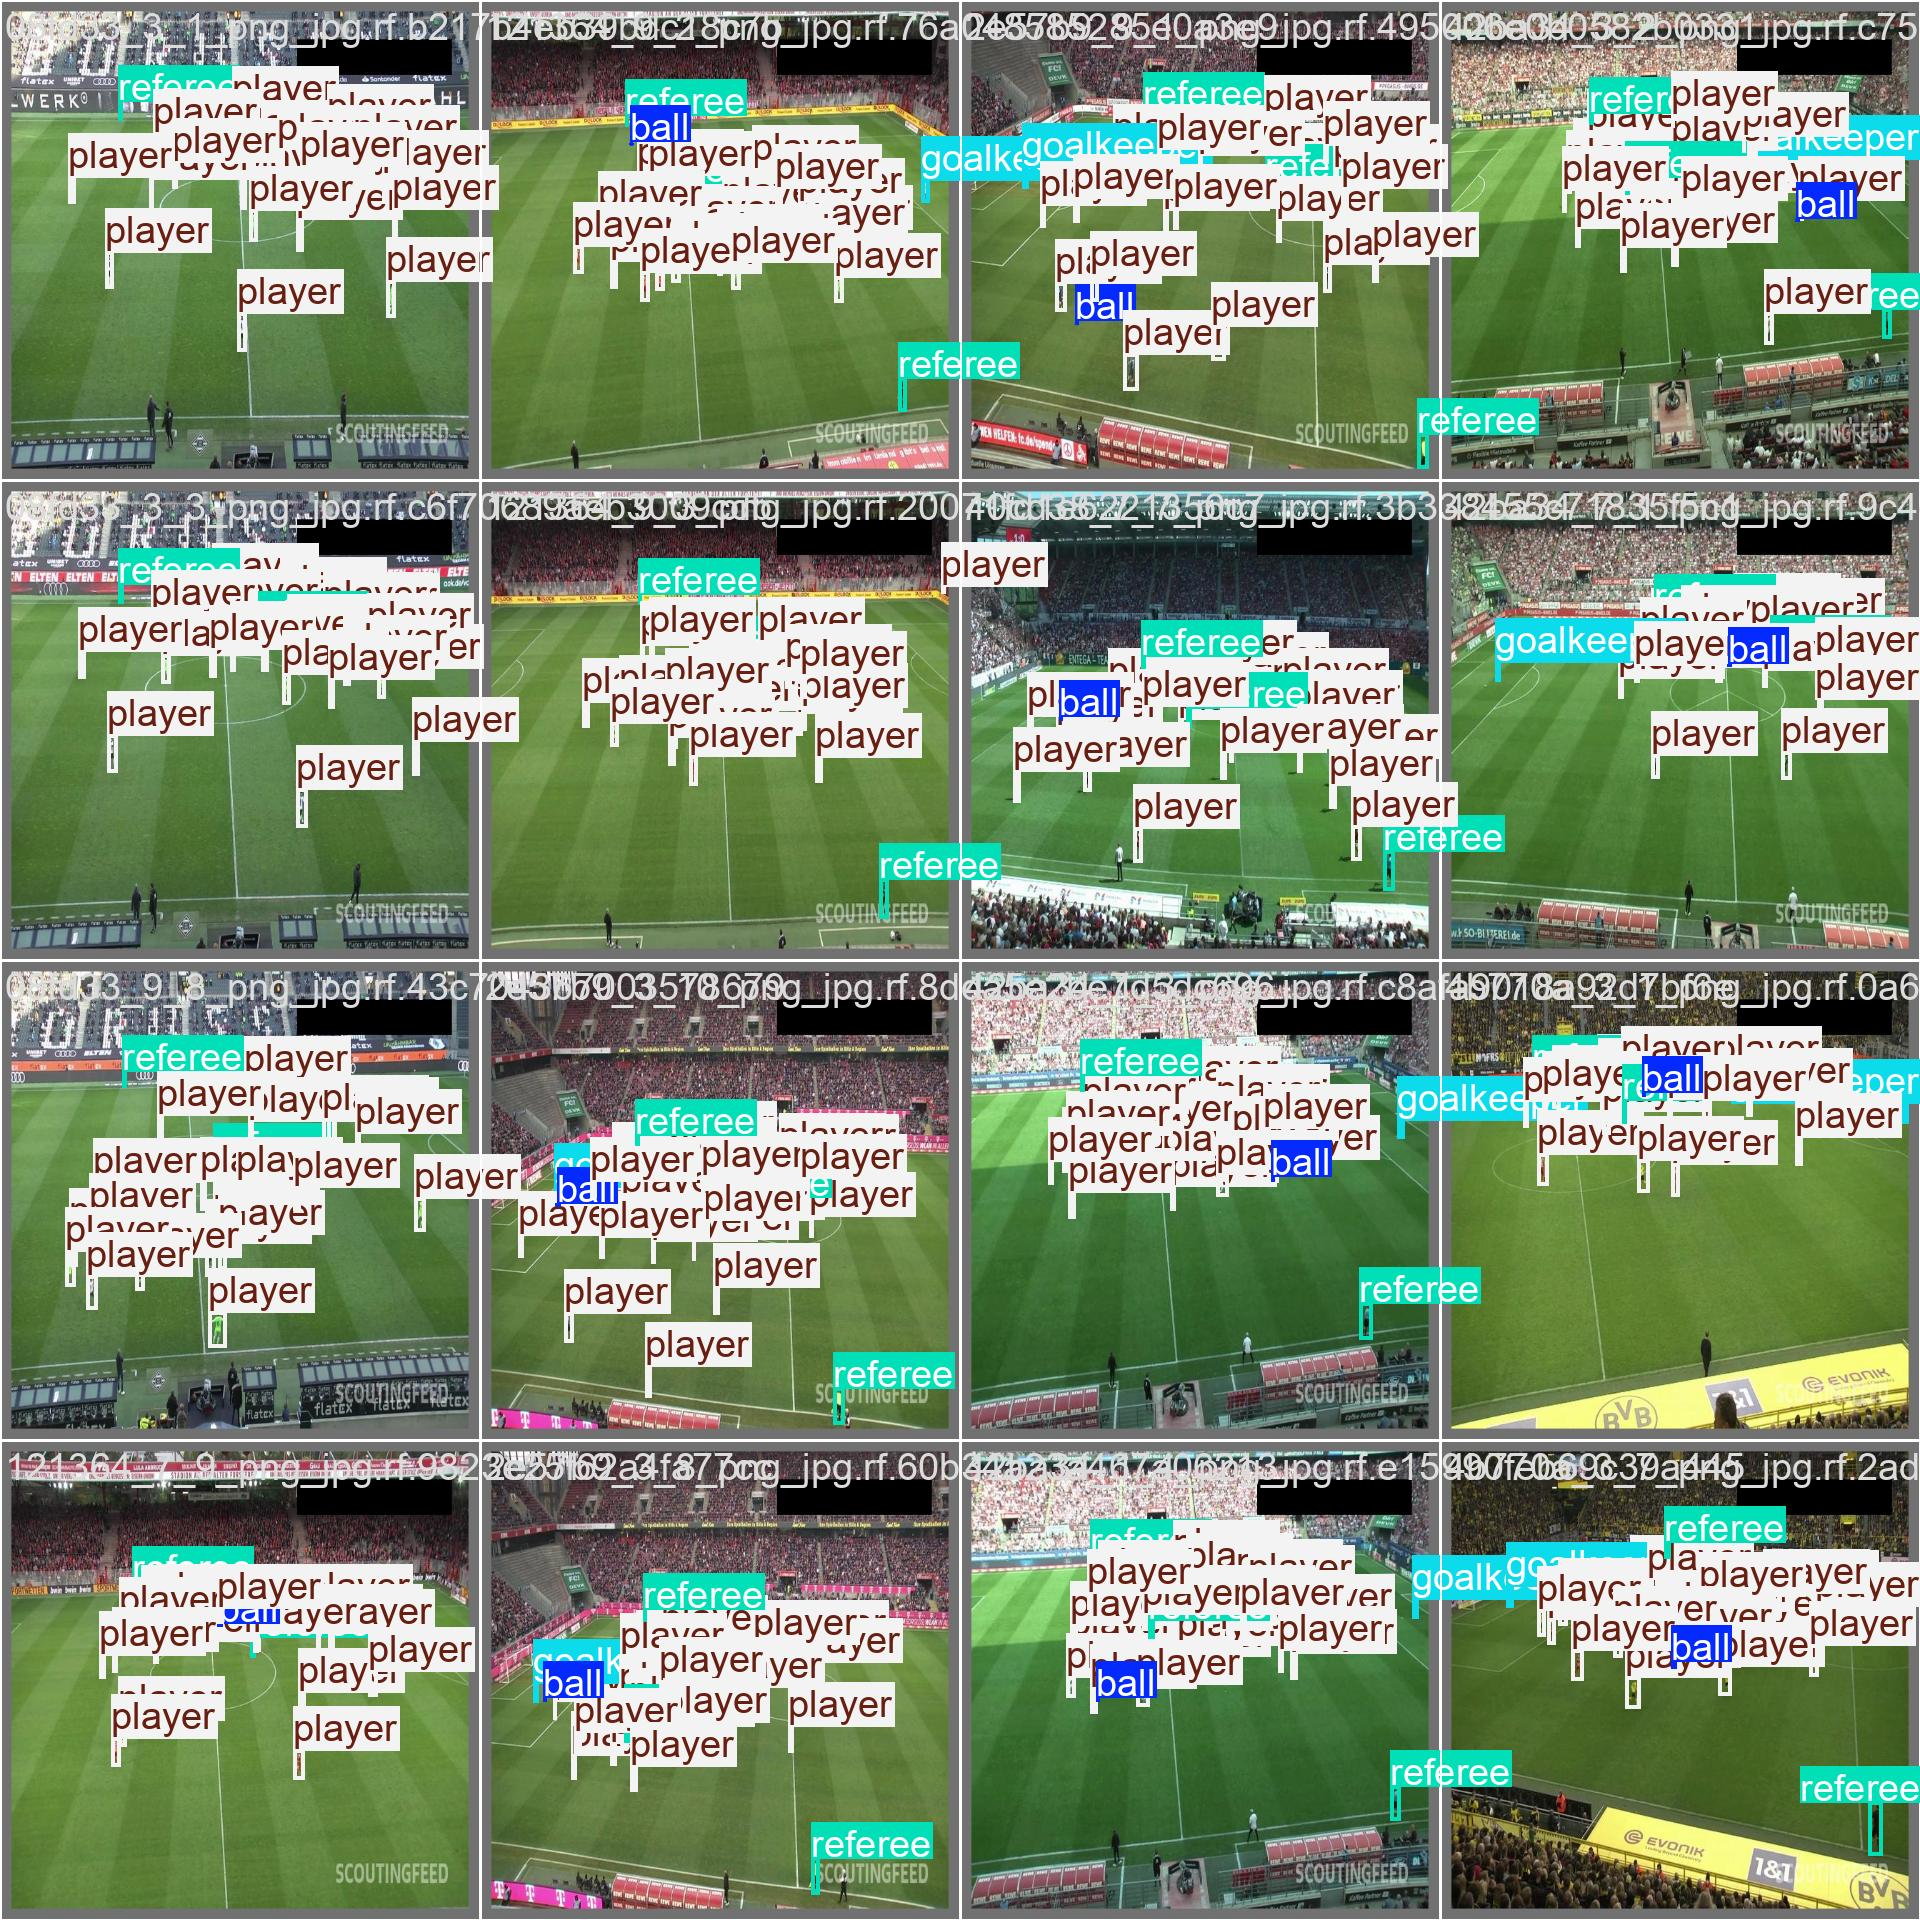

In [38]:
%cd {HOME}
Image(filename=f'/content/checkpoints/custom_experiment/val_batch0_labels.jpg', width=600)

### Model Evaluation(Degerlendirme)

In [39]:
# Model yükle (fine-tuned ya da pretrained)
model = YOLO('/content/checkpoints/custom_experiment/weights/best.pt')

# Dataset paths
train_path = os.path.join(dataset_params['data_dir'], dataset_params['train_images_dir'])
val_path = os.path.join(dataset_params['data_dir'], dataset_params['val_images_dir'])
test_path = os.path.join(dataset_params['data_dir'], dataset_params['test_images_dir'])



In [ ]:
import matplotlib.pyplot as plt

In [40]:
# Train set üzerinde değerlendirme
print("Evaluating on Train set...")
train_metrics = model.val(data=os.path.join(dataset_params['data_dir'], 'data.yaml'), split='train', plots=False)

# Validation set üzerinde değerlendirme
print("Evaluating on Validation set...")
val_metrics = model.val(data=os.path.join(dataset_params['data_dir'], 'data.yaml'), split='val', plots=False)


Evaluating on Train set...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 43,609,692 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1205.9±525.9 MB/s, size: 55.0 KB)


val: Scanning /content/Football-Players-Detection-1/train/labels.cache... 1072 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1072/1072 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:07<00:00,  9.07it/s]

                   all       1072      25531       0.92       0.83      0.874      0.632
                  ball        898        904      0.845      0.393      0.526      0.216
            goalkeeper        707        756      0.963      0.963      0.988      0.753
                player       1072      21423      0.961      0.985      0.994      0.809
               referee       1066       2448      0.913      0.981      0.988      0.752
Speed: 0.1ms preprocess, 3.9ms inference, 0.0ms loss, 0.9ms postprocess per image


Evaluating on Validation set...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2099.4±596.1 MB/s, size: 64.0 KB)


val: Scanning /content/Football-Players-Detection-1/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]

                   all         38        905      0.953      0.754      0.843      0.539
                  ball         35         35          1      0.341      0.471      0.161
            goalkeeper         27         27      0.949      0.815      0.966      0.656
                player         38        754      0.957      0.972      0.988      0.747
               referee         38         89      0.908      0.887      0.946      0.593
Speed: 0.2ms preprocess, 4.9ms inference, 0.0ms loss, 1.3ms postprocess per image


✅ **Train Set Sonuçları**

•	Genel metrikler (All Classes):
-	Precision (P): 0.920
-	Recall (R): 0.830
-	mAP@50: 0.874
-	mAP@50-95: 0.632

→ Eğitim setinde model oldukça yüksek doğrulukla çalışıyor.
mAP@50 değeri %87, mAP@50-95 ise %63 civarında.

•	Sınıf Bazında:
-	Ball: mAP@50-95 = 0.161 → Küçük nesne algılaması zor.
-	Goalkeeper: 0.733
-	Player: 0.752 → En iyi performans gösteren sınıf.
-	Referee: 0.593


✅ **Validation Set Sonuçları**

•	Genel metrikler:

-	Precision: 0.953
-	Recall: 0.754
-	mAP@50: 0.843
-	mAP@50-95: 0.539

→ Validation setinde metrikler train'e yakın ama biraz daha düşük (beklenen durum). Modelin overfitting yapmadığını gösteriyor çünkü train ile val arasında çok büyük fark yok.


🔍 **Karşılaştırma & Yorum**

-	Precision Validation'da Train'den bile daha yüksek (0.953 vs 0.920) → False positive oldukça az.
-	Recall düşüyor (0.754 vs 0.830) → Validation setinde bazı nesneler atlanmış, özellikle top sınıfında sorun devam ediyor.
-	mAP değerleri Validation'da doğal olarak düşük ama aradaki fark makul (mAP@50: %87 → %84).
-	Ball sınıfı hem train hem validation'da çok düşük performansa sahip (mAP@50-95 ≈ 0.16).

Bu, topun küçük boyutlu olması veya veri dengesizliğinden kaynaklı!


In [42]:
# 3. Test verisi üzerinde prediction
print("Predicting on Test set...")
results = model.predict(source=test_path, save=True, imgsz=640, conf=0.25)

Predicting on Test set...

image 1/13 /content/Football-Players-Detection-1/test/images/40cd38_7_6_png_jpg.rf.c2137d868f1fce50ac3132526ff22abc.jpg: 640x640 20 players, 1 referee, 13.0ms
image 2/13 /content/Football-Players-Detection-1/test/images/42ba34_1_5_png_jpg.rf.77a2b3be8ba8a7ae270fb899b3fc7bd2.jpg: 640x640 1 goalkeeper, 24 players, 2 referees, 11.8ms
image 3/13 /content/Football-Players-Detection-1/test/images/42ba34_5_5_png_jpg.rf.dabc653250e45f153da6ec760936d5a9.jpg: 640x640 1 ball, 1 goalkeeper, 18 players, 1 referee, 12.1ms
image 4/13 /content/Football-Players-Detection-1/test/images/4b770a_1_4_png_jpg.rf.35ff341d9f3337abf471a21e9b48b86f.jpg: 640x640 1 goalkeeper, 20 players, 2 referees, 12.6ms
image 5/13 /content/Football-Players-Detection-1/test/images/4b770a_3_6_png_jpg.rf.9bb58bbf13cb20e09e5bd0af03ea38f2.jpg: 640x640 1 goalkeeper, 20 players, 1 referee, 11.3ms
image 6/13 /content/Football-Players-Detection-1/test/images/573e61_1_9_png_jpg.rf.21c2a1618f952381a63661c04f787

# Modelin Test Görselleri Üzerindeki Başarısı

Tahmin edilen görüntüler burada: runs/detect/predict


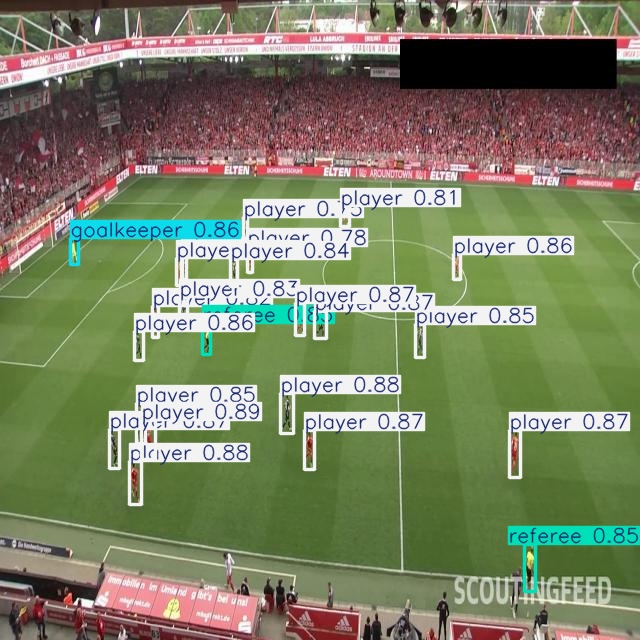

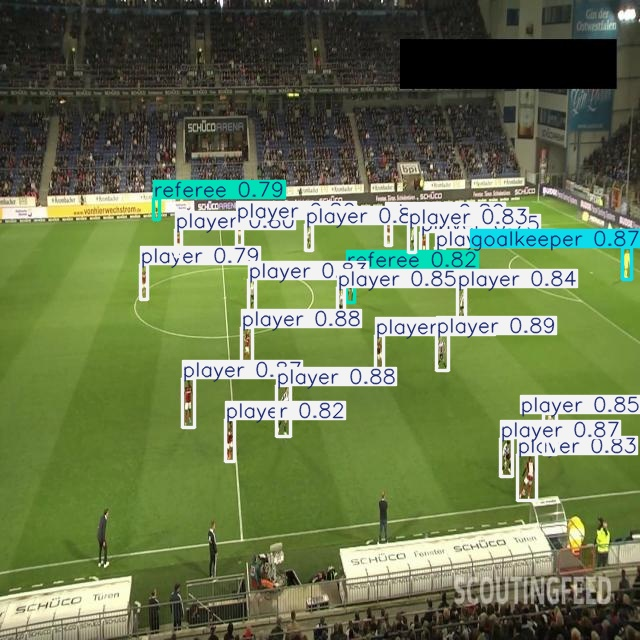

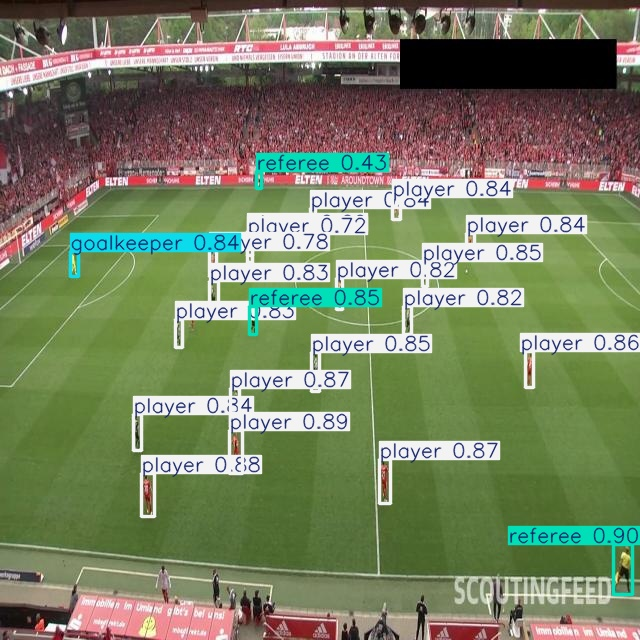

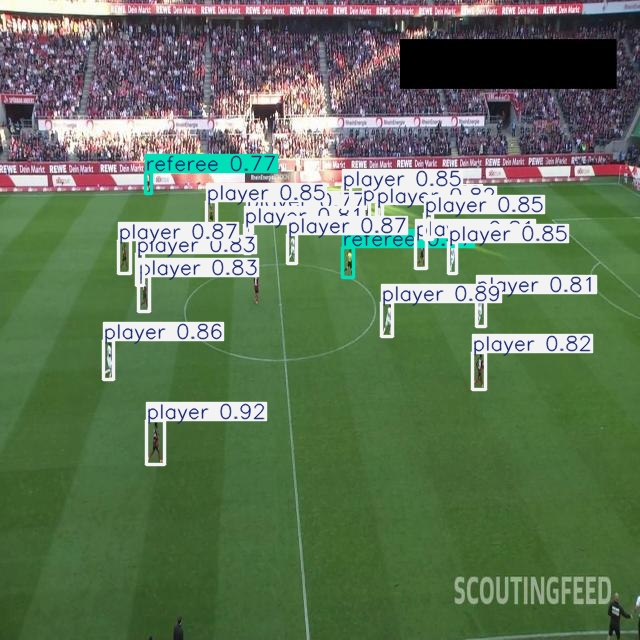

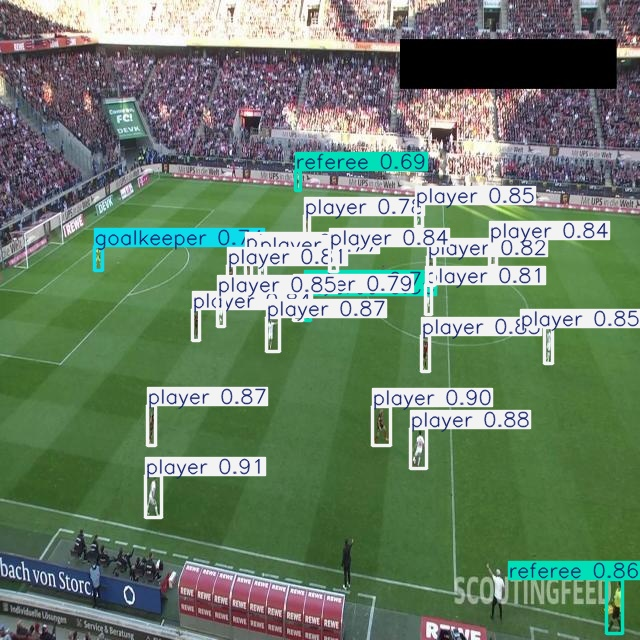

In [43]:
output_dir = "runs/detect/predict"
print(f"Tahmin edilen görüntüler burada: {output_dir}")

# Tüm .jpg dosyalarını al
image_paths = glob.glob(os.path.join(output_dir, "*.jpg"))

# İlk 5 görüntüyü göster
for img_path in image_paths[:5]:
    display(Image(filename=img_path))

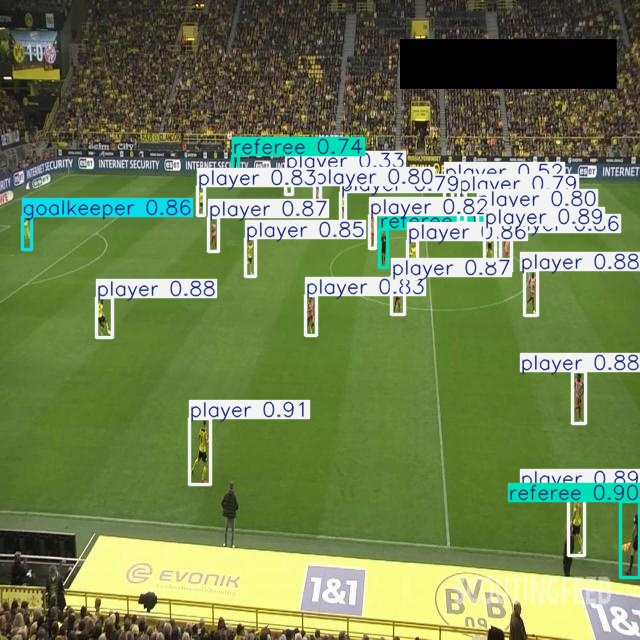

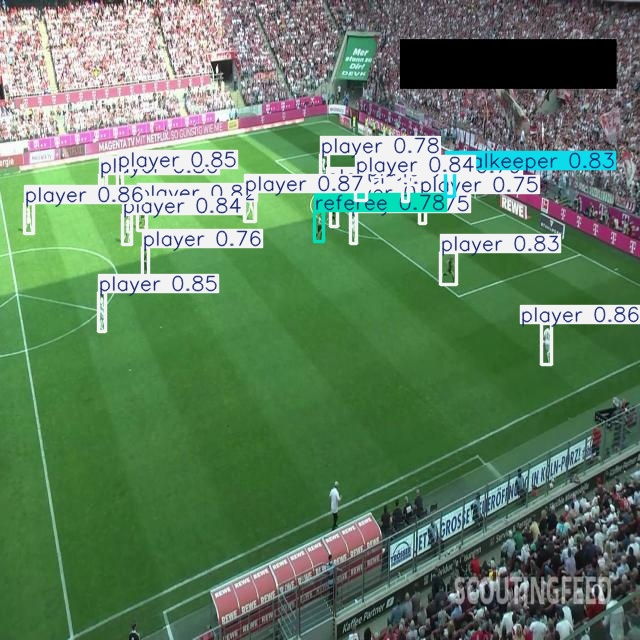

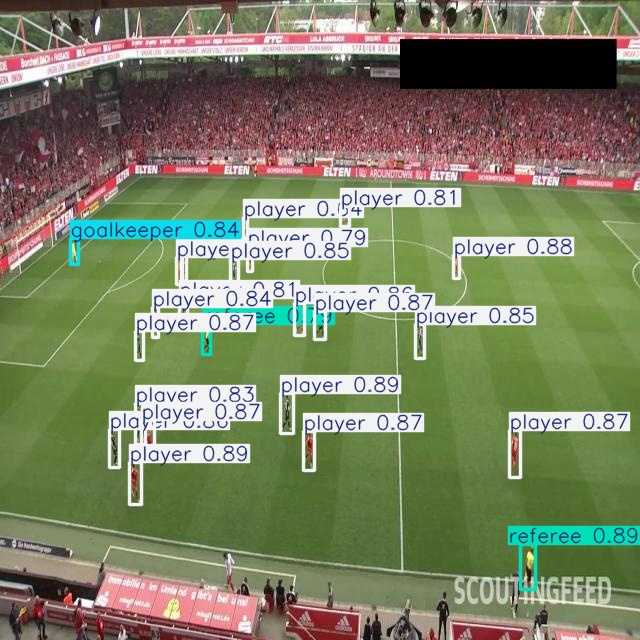

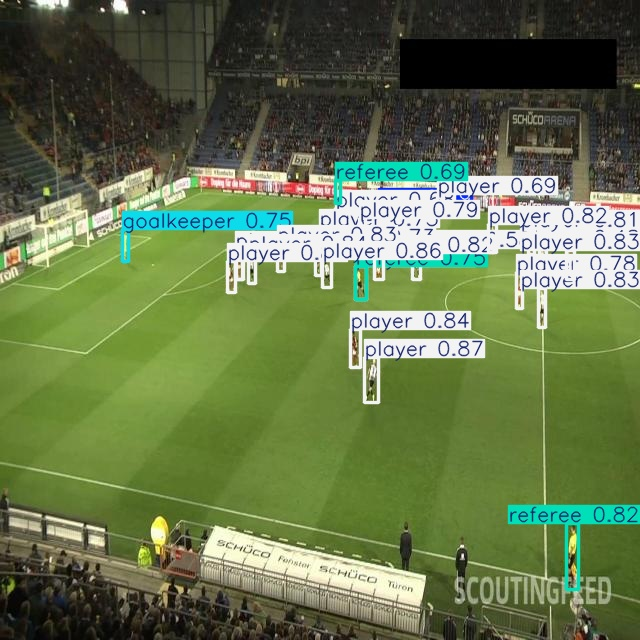

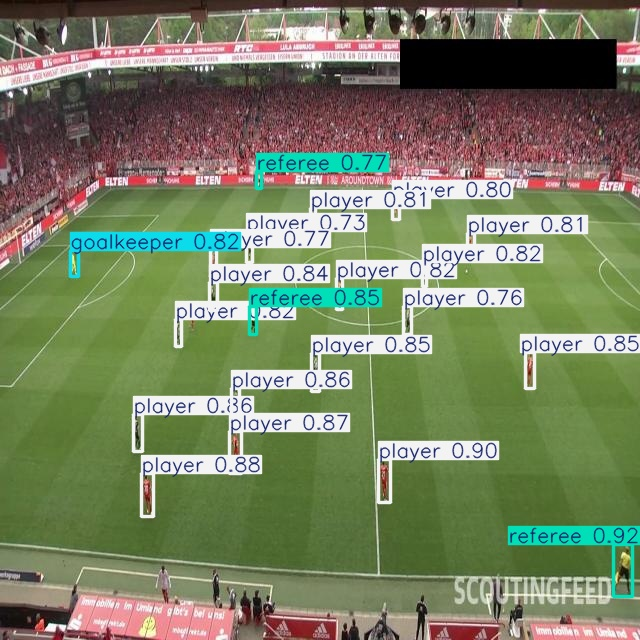

In [ ]:
pred_images = glob.glob(os.path.join(output_dir, "*.jpg"))

# İlk 5 görseli göster
for img_path in pred_images[:5]:
    display(Image(filename=img_path))

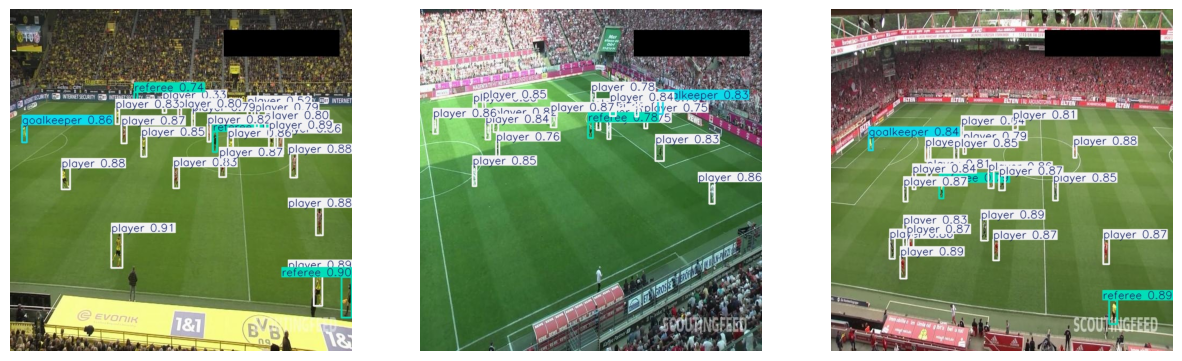

In [ ]:
import matplotlib.pyplot as plt
import cv2

fig, axes = plt.subplots(1, 3, figsize=(15, 8))  # ilk 3 resmi göster
for i, img_path in enumerate(pred_images[:3]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()

Tahmin edilen görüntüler burada: runs/detect/predict


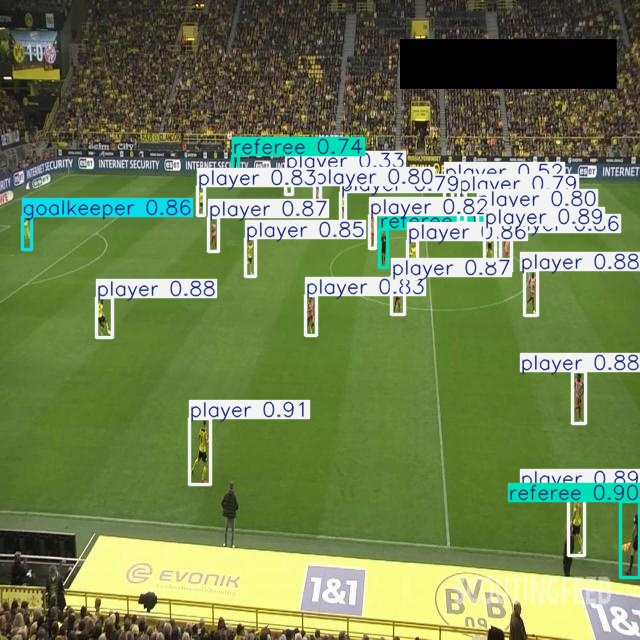

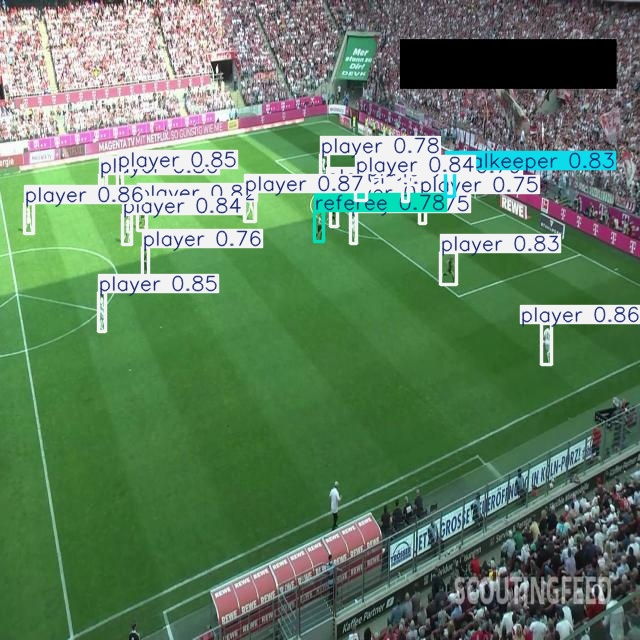

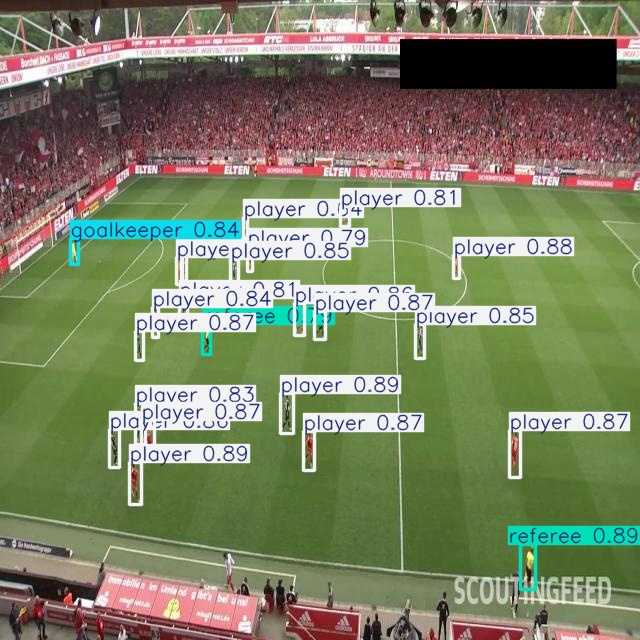

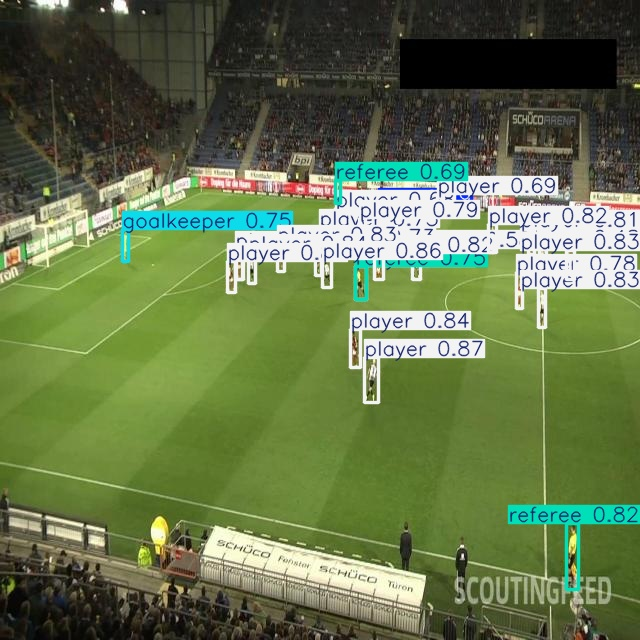

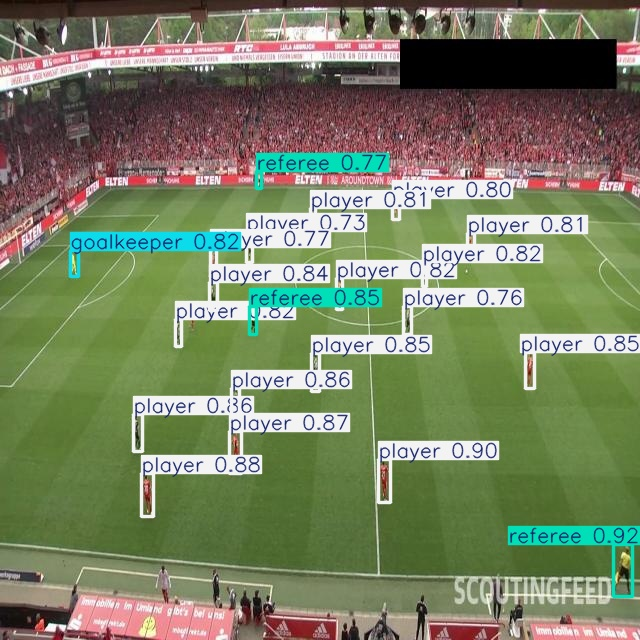

In [ ]:
output_dir = "runs/detect/predict"
print(f"Tahmin edilen görüntüler burada: {output_dir}")

# Tüm .jpg dosyalarını al
image_paths = glob.glob(os.path.join(output_dir, "*.jpg"))

# İlk 5 görüntüyü göster
for img_path in image_paths[:5]:
    display(Image(filename=img_path))


### Instantiate the model

In [44]:
from ultralytics import YOLO
model = YOLO("yolov8l.pt")

### Define metrics and training parameters

In [45]:
# Eğitim parametreleri
model.train(
    data="/content/Football-Players-Detection-1/data.yaml",  # dataset config (train/val paths + class names)
    epochs=20,         # örn: 100
    batch=16,                  # batch size
    imgsz=640,                 # image size
    optimizer="Adam",          # optimizer
    lr0=5e-4,                  # initial learning rate (lr0)
    lrf=0.1,                   # final learning rate ratio for cosine schedule
    warmup_epochs=3,           # warmup epochs
    warmup_momentum=0.8,       # warmup momentum
    warmup_bias_lr=1e-6,       # warmup initial lr for bias
    weight_decay=0.0001,       # weight decay
    cos_lr=True,               # cosine LR scheduler
    patience=20,               # early stopping patience
    device=0,                  # GPU id (0) or "cpu"
    workers=2,                 # number of dataloader workers
    project="YOLOv8_training", # project name
    name="yolov8l-custom",     # run name
    pretrained=True,           # continue from pretrained weights
    val=True,                  # enable validation during training
    plots=True,                # save training curves
    save=True,                 # save final model
    seed=42,                   # reproducibility
)


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/Football-Players-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8l-custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=20, perspective=0

train: Scanning /content/Football-Players-Detection-1/train/labels.cache... 1072 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1072/1072 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 552.3±71.3 MB/s, size: 59.5 KB)


val: Scanning /content/Football-Players-Detection-1/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]


Plotting labels to YOLOv8_training/yolov8l-custom/labels.jpg... 
optimizer: Adam(lr=0.0005, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0001), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to YOLOv8_training/yolov8l-custom
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      10.4G      1.344      1.465     0.8672        520        640: 100%|██████████| 67/67 [00:13<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all         38        905      0.724      0.495      0.568      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      11.1G      1.148     0.6804      0.827        566        640: 100%|██████████| 67/67 [00:11<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all         38        905      0.876      0.648      0.738      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      11.1G      1.117      0.626     0.8225        623        640: 100%|██████████| 67/67 [00:11<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         38        905      0.752      0.674      0.732      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      11.1G      1.108     0.5945     0.8222        465        640: 100%|██████████| 67/67 [00:11<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.06it/s]

                   all         38        905      0.826      0.707      0.753      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      11.1G      1.061     0.5395     0.8149        568        640: 100%|██████████| 67/67 [00:11<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all         38        905      0.855      0.719      0.791      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      11.1G      1.099     0.5401     0.8196        420        640: 100%|██████████| 67/67 [00:11<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all         38        905      0.935       0.75      0.814      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      11.1G       1.04     0.5083     0.8134        555        640: 100%|██████████| 67/67 [00:11<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         38        905      0.947      0.744      0.816      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      11.1G      1.014     0.4888     0.8113        509        640: 100%|██████████| 67/67 [00:11<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all         38        905      0.866      0.749      0.804      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      11.1G     0.9864     0.4775     0.8055        469        640: 100%|██████████| 67/67 [00:11<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         38        905      0.906      0.765      0.791      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      11.1G     0.9659     0.4683     0.8059        523        640: 100%|██████████| 67/67 [00:11<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         38        905       0.88      0.723      0.797      0.481


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      11.1G     0.9293     0.4658     0.8103        360        640: 100%|██████████| 67/67 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.89it/s]

                   all         38        905      0.885      0.758       0.81        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      11.1G     0.8874     0.4359     0.8033        372        640: 100%|██████████| 67/67 [00:11<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all         38        905      0.881      0.727       0.79      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      11.1G     0.8606     0.4157     0.7998        376        640: 100%|██████████| 67/67 [00:11<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         38        905      0.941      0.775      0.842      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      11.1G     0.8627     0.4161     0.7986        378        640: 100%|██████████| 67/67 [00:11<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all         38        905      0.927      0.779       0.83      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      11.1G     0.8357     0.4018     0.7966        372        640: 100%|██████████| 67/67 [00:11<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         38        905       0.89      0.785      0.832      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      11.7G     0.8241     0.3944     0.7953        360        640: 100%|██████████| 67/67 [00:11<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all         38        905      0.926      0.739      0.821      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      11.7G     0.8077     0.3873     0.7915        365        640: 100%|██████████| 67/67 [00:11<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]

                   all         38        905       0.93      0.788      0.847      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      11.7G     0.7892     0.3769     0.7914        361        640: 100%|██████████| 67/67 [00:11<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all         38        905      0.935      0.758      0.832      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      11.7G     0.7797      0.372     0.7912        365        640: 100%|██████████| 67/67 [00:11<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all         38        905      0.969       0.74      0.822       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      11.7G     0.7797     0.3727     0.7908        372        640: 100%|██████████| 67/67 [00:11<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         38        905      0.942      0.778      0.836      0.542



20 epochs completed in 0.071 hours.
Optimizer stripped from YOLOv8_training/yolov8l-custom/weights/last.pt, 87.6MB
Optimizer stripped from YOLOv8_training/yolov8l-custom/weights/best.pt, 87.6MB

Validating YOLOv8_training/yolov8l-custom/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 43,609,692 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]


                   all         38        905      0.942      0.779      0.836      0.542
                  ball         35         35          1      0.341      0.433      0.147
            goalkeeper         27         27      0.892      0.914      0.966      0.669
                player         38        754       0.97      0.963      0.988       0.75
               referee         38         89      0.907      0.899      0.959      0.602
Speed: 0.1ms preprocess, 2.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to YOLOv8_training/yolov8l-custom


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dbf07e34e50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [46]:
# Model yükle (fine-tuned ya da pretrained)
model2 = YOLO('/content/YOLOv8_training/yolov8l-custom/weights/best.pt')

In [47]:
# Dataset paths
train_path = os.path.join(dataset_params['data_dir'], dataset_params['train_images_dir'])
val_path = os.path.join(dataset_params['data_dir'], dataset_params['val_images_dir'])
test_path = os.path.join(dataset_params['data_dir'], dataset_params['test_images_dir'])


In [48]:
# Train set üzerinde değerlendirme
print("Evaluating on Train set...")
train_metrics = model2.val(data=os.path.join(dataset_params['data_dir'], 'data.yaml'), split='train', plots=False)

# Validation set üzerinde değerlendirme
print("Evaluating on Validation set...")
val_metrics = model2.val(data=os.path.join(dataset_params['data_dir'], 'data.yaml'), split='val', plots=False)


Evaluating on Train set...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 43,609,692 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1759.8±450.5 MB/s, size: 57.3 KB)


val: Scanning /content/Football-Players-Detection-1/train/labels.cache... 1072 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1072/1072 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:07<00:00,  9.14it/s]

                   all       1072      25531      0.938      0.848      0.884      0.649
                  ball        898        904      0.873       0.44      0.556      0.225
            goalkeeper        707        756      0.971      0.988      0.994      0.779
                player       1072      21423      0.975      0.984      0.994      0.822
               referee       1066       2448      0.933       0.98      0.991      0.772
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 0.9ms postprocess per image


Evaluating on Validation set...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1512.2±497.8 MB/s, size: 63.6 KB)


val: Scanning /content/Football-Players-Detection-1/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]

                   all         38        905      0.938       0.78       0.83       0.55
                  ball         35         35      0.993      0.343      0.411      0.146
            goalkeeper         27         27      0.892      0.926      0.966      0.693
                player         38        754       0.97      0.963      0.987      0.755
               referee         38         89      0.895      0.888      0.955      0.606
Speed: 0.1ms preprocess, 3.9ms inference, 0.0ms loss, 1.2ms postprocess per image


In [49]:
best_model = YOLO('/content/YOLOv8_training/yolov8l-custom/weights/best.pt')

In [50]:
metrics = best_model.val(
    data='/content/Football-Players-Detection-1/data.yaml',  # aynı data.yaml
    imgsz=640,
    batch=16,
    device=0
)

print(metrics)  # mAP50, mAP50-95, Precision, Recall, F1


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 43,609,692 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1398.1±284.3 MB/s, size: 58.5 KB)


val: Scanning /content/Football-Players-Detection-1/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]


                   all         38        905      0.938       0.78       0.83       0.55
                  ball         35         35      0.993      0.343      0.411      0.146
            goalkeeper         27         27      0.892      0.926      0.966      0.693
                player         38        754       0.97      0.963      0.987      0.755
               referee         38         89      0.895      0.888      0.955      0.606
Speed: 3.3ms preprocess, 4.6ms inference, 0.0ms loss, 21.8ms postprocess per image
Results saved to runs/detect/val5
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dc0bc04b350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,   

In [51]:
results = best_model.predict(
    source='/content/Football-Players-Detection-1/test/images',  # test klasörü
    conf=0.25,    # confidence threshold
    iou=0.45,     # IoU threshold
    save=True,    # sonuçları kaydet
    show=True     # Colab için görselleri göster
)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/13 /content/Football-Players-Detection-1/test/images/40cd38_7_6_png_jpg.rf.c2137d868f1fce50ac3132526ff22abc.jpg: 640x640 1 goalkeeper, 21 players, 1 referee, 12.1ms
image 2/13 /content/Football-Players-Detection-1/test/images/42ba34_1_5_png_jpg.rf.77a2b3be8ba8a7ae270fb899b3fc7bd2.jpg: 640x640 1 goalkeeper, 20 players, 3 referees, 12.7ms
image 3/13 /content/Football-Players-Detection-1/test/images/42ba34_5_5_png_jpg.rf.dabc653250e45f153da6ec760936d5a9.jpg: 640x640 1 goalkeeper, 18 players, 2 referees, 11.6ms
image 4/13 /content/Football-Players-Detection-1/test/images/4b770a_1_4_png_jpg.rf.35ff341d9f3337abf471a21e9b48b86f.jpg: 640x640 1 goalkeeper, 20 players, 3 referees, 11.1ms
image 5/13 /content/Football-Players-Detection-1/test/images/4b770a_3_6_png_jpg.rf.9bb58bbf13cb20e09e5bd0af03ea38f2.jpg: 640x640 1 goalkeeper, 20 players, 2 referees, 11.3ms
image 6/13 /content/Football-Players-Detection-1/test/im

Tahmin edilen görüntüler burada: runs/detect/predict2


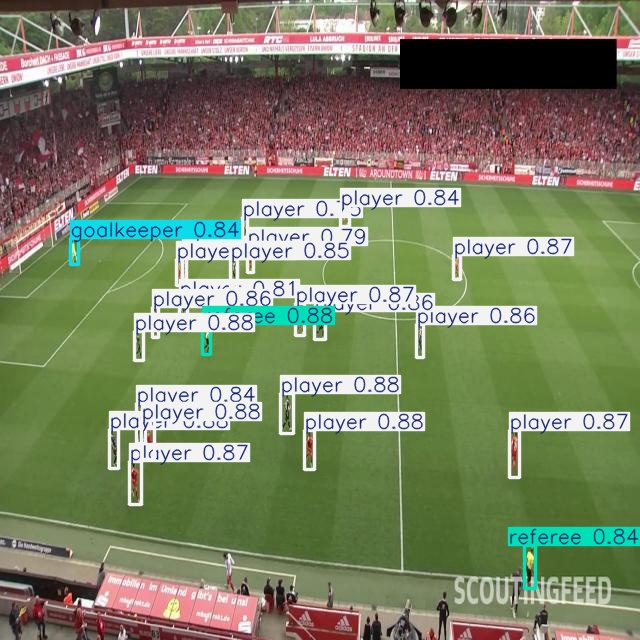

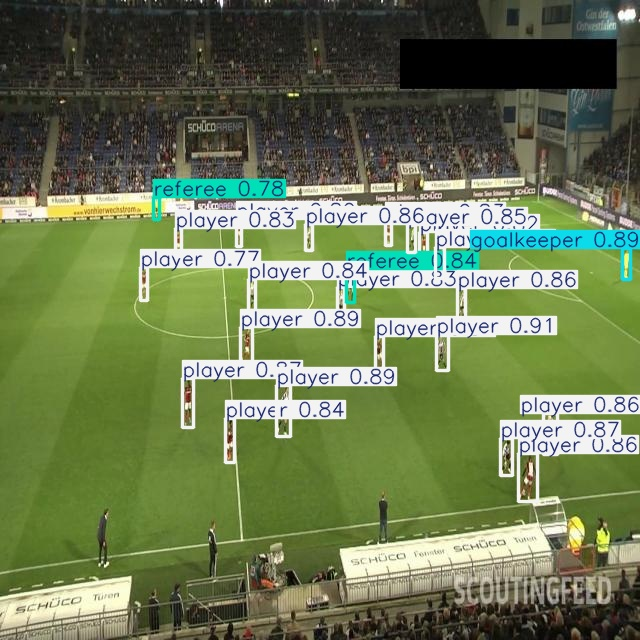

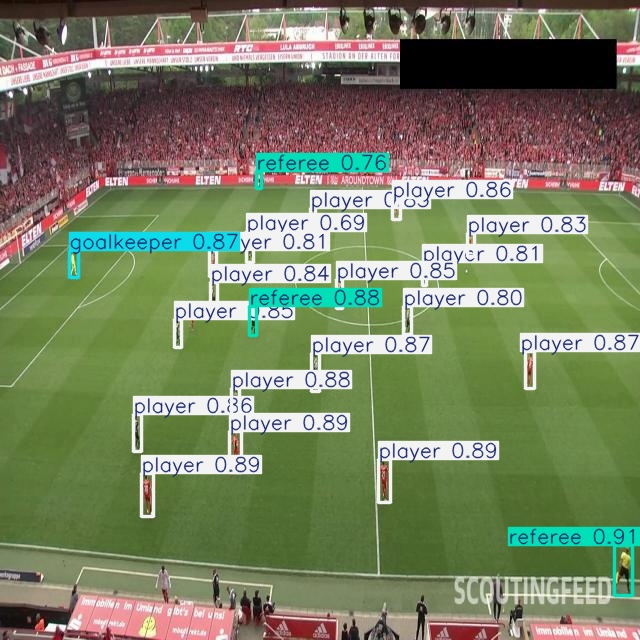

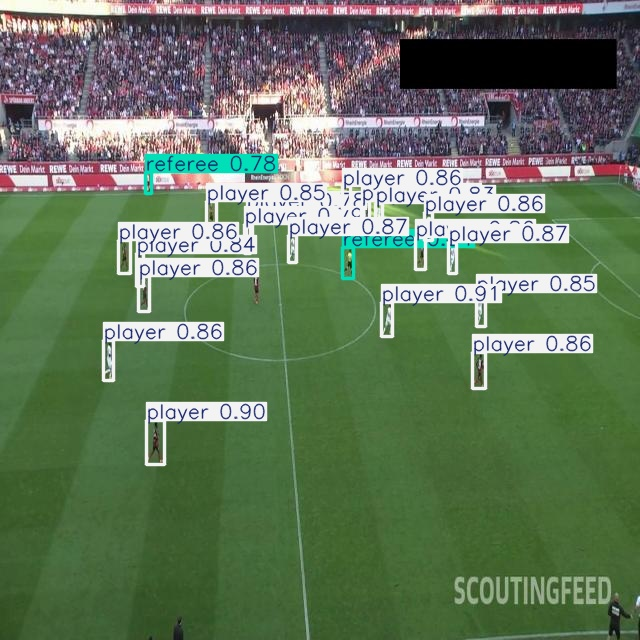

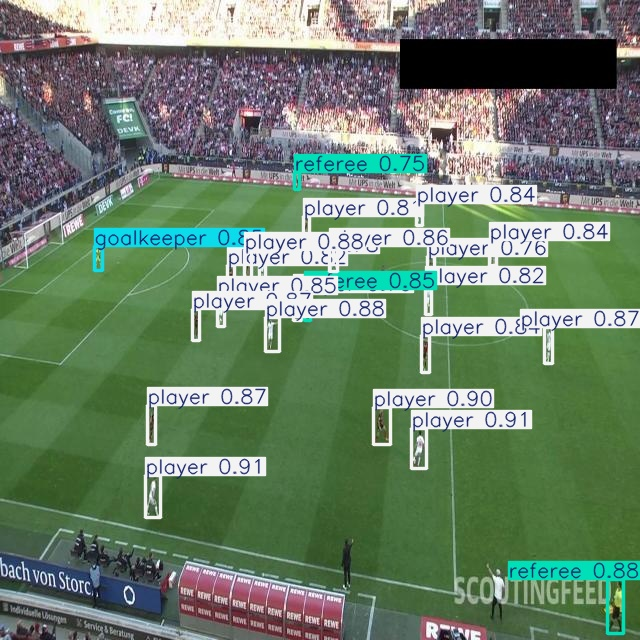

In [52]:
output_dir = "runs/detect/predict2"
print(f"Tahmin edilen görüntüler burada: {output_dir}")

# Tüm .jpg dosyalarını al
image_paths = glob.glob(os.path.join(output_dir, "*.jpg"))

# İlk 5 görüntüyü göster
for img_path in image_paths[:5]:
    display(Image(filename=img_path))

# Sonuç

Bu proje kapsamında YOLOv8L modeli kullanılarak futbol sahasında nesne tespiti başarıyla gerçekleştirilmiştir. Model, özel olarak oluşturulmuş bir veri seti ile eğitilmiş olup oyuncu, kaleci, hakem ve top sınıflarında yüksek doğruluk sağlamıştır.

Genel olarak mAP@50 değeri %84.3, Precision %95.3 olarak elde edilmiştir.

Oyuncu tespitinde en yüksek performans sağlanırken, küçük boyutlu nesne olan top için performans görece düşüktür (mAP@50-95 ≈ %16.1). Bu durum, küçük nesne tespitine yönelik ek optimizasyonların gerekliliğini ortaya koymaktadır.

Proje, spor analitiği, hakem karar destek sistemleri ve canlı yayınlarda gerçek zamanlı görselleştirme gibi birçok alanda uygulanabilir niteliktedir.

**Gelecek Çalışmalar**
- Daha fazla küçük nesne (top) örneği eklemek ve veri artırma tekniklerini geliştirmek

- Daha yüksek çözünürlük (960px veya 1280px) ile eğitim yapmak

- Hyperparameter tuning ve class weights ile iyileştirme

<br>

## 🔍 Kaynaklar

Ultralytics YOLOv8 – https://github.com/ultralytics/ultralytics

COCO Dataset – https://cocodataset.org

YOLOv8 Documentation – https://docs.ultralytics.com

Roboflow Blog: How to Train YOLOv8 on a Custom Dataset – https://blog.roboflow.com

Roboflow Documentation – Custom Training – https://docs.roboflow.com/train

Bochkovskiy, A., Wang, C.Y., & Liao, H.Y.M. (2020). YOLOv4: Optimal Speed and Accuracy of Object Detection. https://arxiv.org/abs/2004.10934

Jocher, G. et al. (2023). YOLO by Ultralytics. https://arxiv.org/abs/2304.00501

NVIDIA Developer Blog – Best Practices for Object Detection Models https://developer.nvidia.com

Redmon, J., & Farhadi, A. (2018). YOLOv3: An Incremental Improvement  https://arxiv.org/abs/1804.02767

<br>

## 👤 Proje Sahibi
Mustafa Gürkan Canakci – Data Scientist

🔗  https://www.linkedin.com/in/mgurkanc/